In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import math

Text(0, 0.5, 'Concentration')

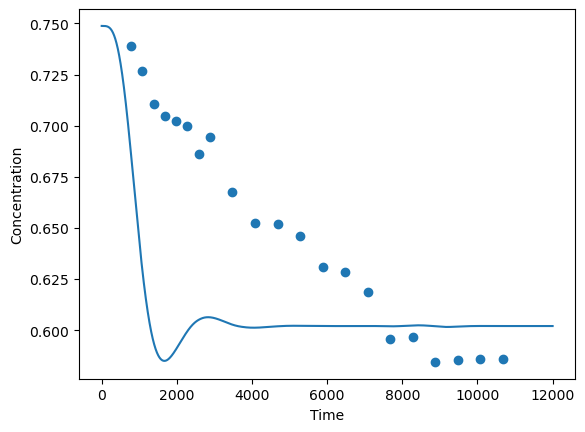

In [3]:
def generateODE8(t, m):
    # Unpack the variables from the y vector
    m00, m10, m01, m11, c = m

    Ci = 0.74875                    # gm/(100 gm of mixed solvent)
    Ce = 0.488                      # gm/(100 gm of mixed solvent)
    
    # Calculate necessary quantities
    
    A1= 0.001
    g1= 1.3674422124010206
    A2= 0.001
    g2= 0.8806401378356327
    kb= 1.9159735378591962
    b= 0.11727791169769848
    
    f = 4.167 * 10**-7                     # m3/sec 
    ρc = 1400 * 10**3                    # gm/m3
    h = 1 * 10**(-5)                     # m
    Vc = h * m11
    ρl = 785 * 10**3                     # gm/m3
    V = 0.0002
    tau = V / f
    
    delta_c = max(c - Ce, 0)
    s = delta_c / Ce
    
    Gl = A1 * (s)**g1
    Gw = A2 * (s)**g2
    B = kb * (s)**b

    dm00 = B - (m00 / tau)
    dm10 = (Gl * m00) - (m10 / tau)
    dm01 = (Gw * m00) - (m01 / tau)
    dm11 = (Gl * m10) + (Gw * m01) - (m11 / tau)
    dc = (Ci / tau) - (c / tau) - (ρc / ρl) * Vc
    
        
    return [dm00, dm10, dm01, dm11, dc]
t_span8 = (0, 12000)  # Adjust this to match the maximum time in your data
num_points8 = 12000
initialConditions8 = [0, 0, 0, 0, 0.74879]
sol8 = solve_ivp(
    lambda t, m: generateODE8(t, m),
    t_span8,
    initialConditions8,
    t_eval=np.linspace(t_span8[0], t_span8[1], num_points8)
)
Time8=[780,1080,1380,1680,1980,2280,2580,2880,3480,4080,4680,5280,5880,6480,7080,7680,8280,8880,9480,10080,10680]
Concentration8=[0.7389686522,0.7266647375,0.7104908473,0.7045533115,0.7020744072,0.6996731009,0.6862451495,0.6945321379,0.6676608997,0.6523242609,0.6521269704,0.6459412781,0.6308360032,0.6284849703,0.6184410652,0.5958937535,0.596790337,0.5844564649,0.5853925637,0.5861264758,0.5860805861]
plt.scatter(Time8, Concentration8)
plt.plot(sol8.t,sol8.y[4])
plt.xlabel("Time")
plt.ylabel("Concentration")